Beginner Level Task 2 - Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
#stock market analysis is divided into two parts – Fundamental Analysis and Technical Analysis.

#Fundamental Analysis involves analyzing the company’s future profitability on the basis of its current business environment
#and financial performance.
#Technical Analysis, on the other hand, includes reading the charts and using statistical figures to identify the trends 
#in the stock market.

In [ ]:
#We will first load the dataset and define the target variable for the problem:

In [ ]:
#import packages
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [ ]:
import pandas as pd #for analysis and manipulation of numerical tables

In [ ]:
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
#read the file 
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
stock_data = pd.read_csv(url)

In [ ]:
stock_data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
print(stock_data.isnull().sum())

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64


In [ ]:
stock_data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
stock_data1 = stock_data.reset_index()['Close']

In [ ]:
stock_data1.shape

(2035,)

In [ ]:
stock_data1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

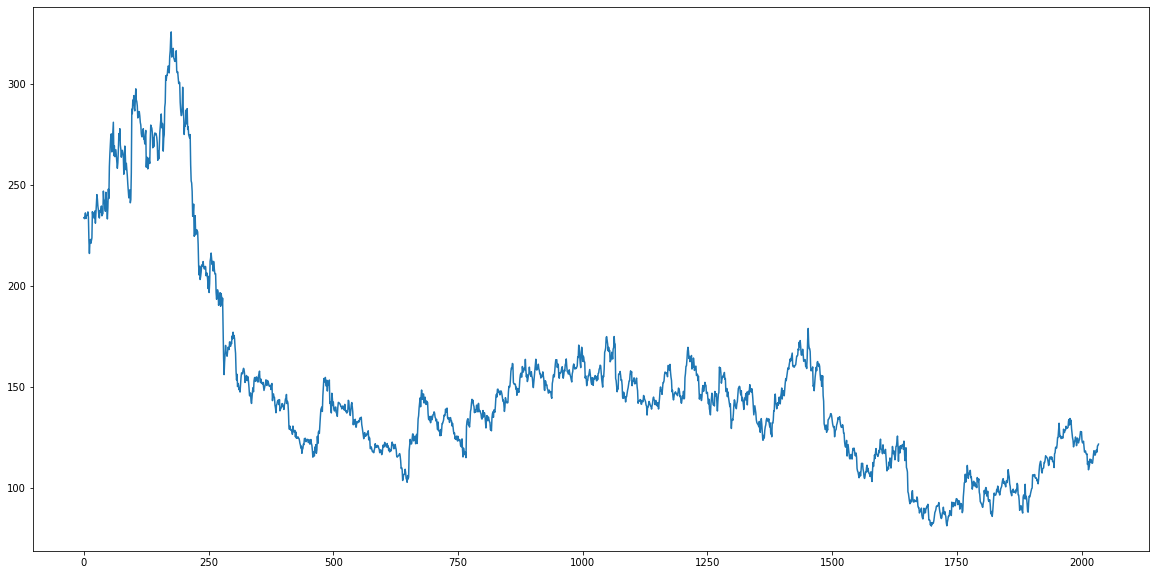

In [ ]:
import matplotlib.pyplot as plt
plt.plot(stock_data1)

In [ ]:
stock_data1 = scaler.fit_transform(np.array(stock_data1).reshape(-1,1))

In [ ]:
stock_data1 #array has been transformed into values ranging from 0 to 1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [ ]:
#splitting data into train and test datasets
train_size = int(len(stock_data1)*0.65)
test_size = len(stock_data1) - train_size
train_data, test_data = stock_data1[0:train_size,:],stock_data1[train_size:len(stock_data1),:1]

In [ ]:
Preprocess the data
def create_dataset(dataset, time_step=1):
  x, y = [],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    x.append(a)
    y.append(dataset[i+time_step,0])
  return np.array(x),np.array(y)

In [ ]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [ ]:
#reshaping input for LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
create the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
#adding layers
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#fit the model
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 10s 267ms/step - loss: 0.0352 - val_loss: 0.0051
Epoch 2/100
20/20 [==============================] - 4s 198ms/step - loss: 0.0042 - val_loss: 0.0021
Epoch 3/100
20/20 [==============================] - 4s 194ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 4/100
20/20 [==============================] - 4s 199ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 5/100
20/20 [==============================] - 4s 202ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 6/100
20/20 [==============================] - 4s 197ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 7/100
20/20 [==============================] - 4s 198ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 8/100
20/20 [==============================] - 4s 205ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 9/100
20/20 [==============================] - 4s 204ms/step - loss: 0.0012 - val_loss: 8.0410e-04
Epoch 10/100
20/20 [==============================] - 4s 198ms/step - loss: 0.0011 - v

In [ ]:
import tensorflow as tf #importing the tensorflow library to predict
train_prediction = model.predict(x_train)
test_prediction = model.predict(x_test)

In [ ]:
train_prediction = scaler.inverse_transform(train_prediction)
test_prediction = scaler.inverse_transform(test_prediction)

In [ ]:
calculate RSME (Root Mean Square Error)
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_prediction)) #for training data


168.22732013400815

In [ ]:
math.sqrt(mean_squared_error(y_test,test_prediction)) #for testing data

117.3557083781083

In [ ]:
look_back=100
trainPredictionPlot = np.empty_like(stock_data1) #shifting training predictions
trainPredictionPlot[:, :] = np.nan
trainPredictionPlot[look_back:len(train_prediction)+look_back, :] = train_prediction
testPredictionPlot = np.empty_like(stock_data1) #shifting test predictions
testPredictionPlot[:, :] = np.nan
testPredictionPlot[len(train_prediction)+(look_back*2)+1:len(stock_data1)-1, :] = test_prediction

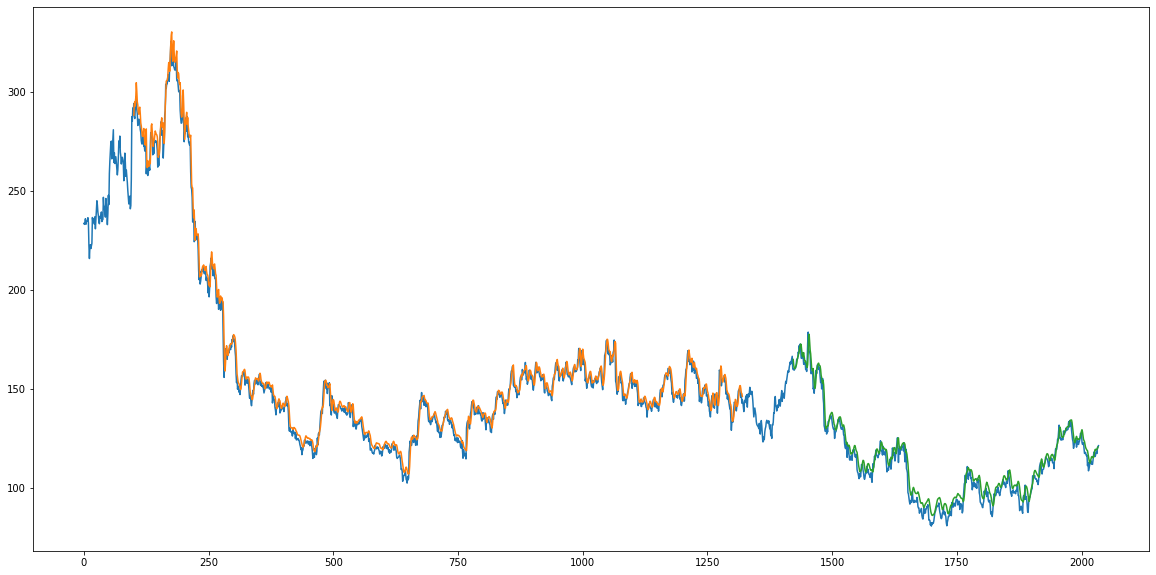

In [ ]:
plt.plot(scaler.inverse_transform(stock_data1))
plt.plot(trainPredictionPlot)
plt.plot(testPredictionPlot)
plt.show()

In [ ]:
len(test_data)

713

In [ ]:
x_input=test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
#Prediction for next 15 days
from numpy import array

final_output=[]
n_steps=100
i=1
while(i<=15):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        ypred = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,ypred))
        temp_input.extend(ypred[0].tolist())
        temp_input=temp_input[1:]
        final_output.extend(ypred.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        ypred = model.predict(x_input, verbose=0)
        print(ypred[0])
        temp_input.extend(ypred[0].tolist())
        print(len(temp_input))
        final_output.extend(ypred.tolist())
        i=i+1
    

print(final_output)

1 day input [0.15788399 0.16441993 0.17892157 0.17933007 0.19260621 0.20812908
 0.18974673 0.18055556 0.18239379 0.17708333 0.17810458 0.18055556
 0.17810458 0.17851307 0.19607843 0.18913399 0.18954248 0.19403595
 0.19444444 0.20200163 0.19771242 0.19934641 0.19873366 0.1997549
 0.2128268  0.21568627 0.20445261 0.21772876 0.21098856 0.21425654
 0.19750817 0.18811275 0.17851307 0.17381536 0.16033497 0.16564542
 0.17116013 0.17422386 0.18035131 0.17401961 0.16278595 0.16973039
 0.17810458 0.17034314 0.16830065 0.17279412 0.17544935 0.18382353
 0.19138072 0.18913399 0.19097222 0.17238562 0.16830065 0.1693219
 0.17177288 0.16156046 0.14971405 0.1503268  0.15196078 0.14726307
 0.14501634 0.14603758 0.12479575 0.13112745 0.11397059 0.1190768
 0.12377451 0.13562092 0.12908497 0.13459967 0.12806373 0.13031046
 0.12724673 0.13521242 0.14522059 0.15257353 0.14848856 0.14338235
 0.14562908 0.15236928 0.15400327 0.14971405 0.1621732  0.16319444
 0.16584967 0.17078257 0.17457455 0.1783099  0.181937